In [ ]:
import os

!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [47]:
import pandas as pd
from scipy.spatial.distance import mahalanobis

# read data into a pandas dataframe
data = pd.read_csv('https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt', header=None, names=['x', 'y'])

In [57]:
import numpy as np
import pandas as pd

# Define the parameters
P = np.array([[10, 0.5], [-10, 0.25]])
P_inv = np.linalg.inv(P)
k = 5
max_iter = 100

# Initialize the centroids
centroids = np.array([[10, 10], [-10, -10], [2, 2], [3, 3], [-3, -3]])


In [58]:
X = np.array(data)

In [59]:
# Run the specialized k-means algorithm
for i in range(max_iter):
    # Assign each point to the closest centroid
    clusters = [[] for _ in range(k)]
    for x in X:
        distances = [mahalanobis(x, centroid, P_inv) for centroid in centroids]
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(x)

    # Update the centroids
    for j in range(k):
        cluster_size = len(clusters[j])
        if cluster_size > 0:
            centroids[j] = np.mean(clusters[j], axis=0)

    # Check for convergence
    if i > 0 and np.allclose(prev_centroids, centroids):
        break
    prev_centroids = centroids.copy()

# Assign each point to the final cluster
final_clusters = [[] for _ in range(k)]
for x in X:
    distances = [mahalanobis(x, centroid, P_inv) for centroid in centroids]
    cluster_index = np.argmin(distances)
    final_clusters[cluster_index].append(x)

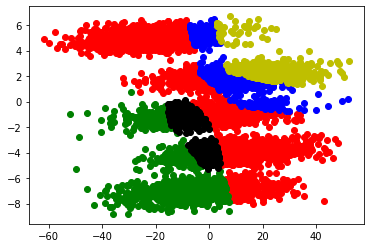

In [60]:
# Plot the results
import matplotlib.pyplot as plt

colors = ['r', 'g', 'b', 'y', 'k']
for j in range(k):
    cluster_points = np.array(final_clusters[j])
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[j])
plt.show()

In [61]:
aggregate_data = np.mean(data, axis=0)

# Compute the covariance matrix of the data
covariance = np.cov(data, rowvar=False)

# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(covariance)

In [62]:
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

Eigenvalues: [322.50713273  17.38845582]
Eigenvectors:
 [[ 0.99838317  0.05684225]
 [-0.05684225  0.99838317]]
